In [ ]:
'''
Classification - Iris data set from seaborn library
Last Updated : 03/30/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Classification using Keras
Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


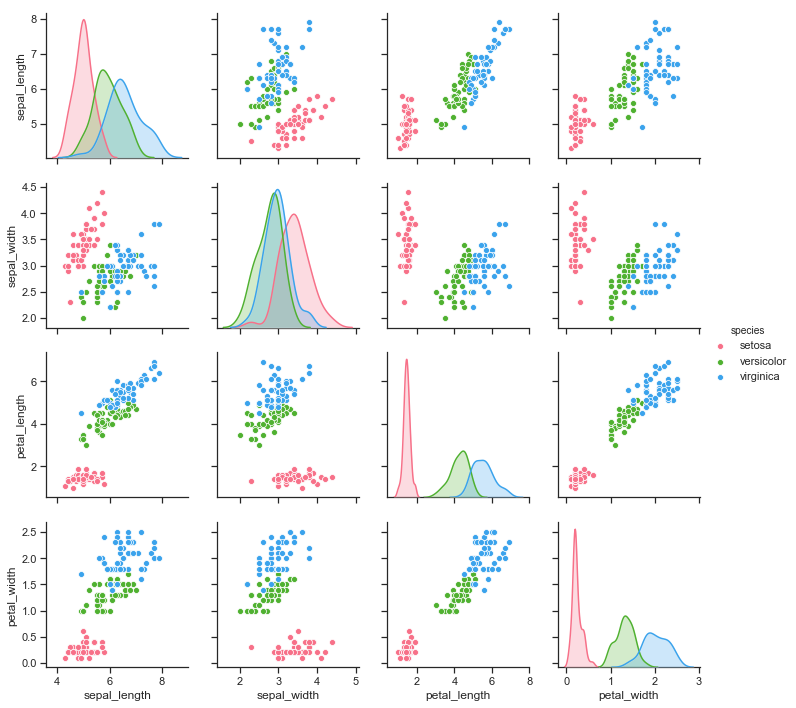

In [37]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue="species", palette="husl")

In [38]:
print(iris.info())
print(iris['species'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
['setosa' 'versicolor' 'virginica']


In [39]:
x = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y = encoder.fit_transform(y)
y = pd.get_dummies(y).values
print(y.shape)

(150, 3)


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(4,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3,  activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Text(0.5, 1.0, 'accuracy')

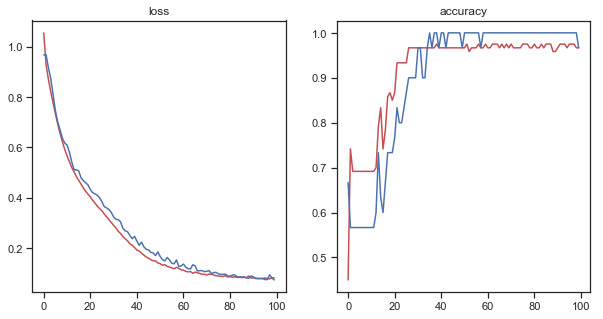

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('accuracy')

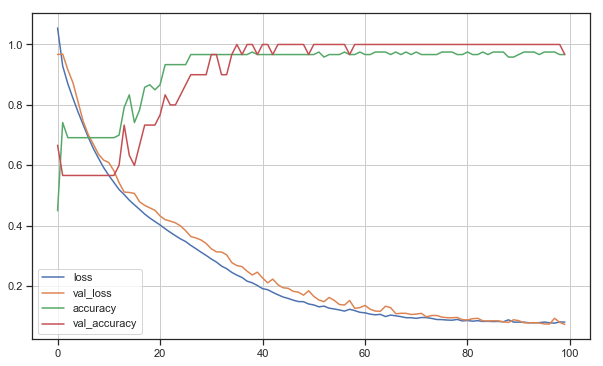

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()

In [51]:
loss, accuracy = model.evaluate(_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 0us/step
Accuracy = 0.97


In [52]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [56]:
test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted target name: {}".format(
    iris['species'].unique()[model.predict_classes(test_set)]))
iris.query("species == 'versicolor'")

test_set = np.array([[7, 3.0, 5, 1.4]])
print("Predicted target name: {}".format(
    iris['species'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['setosa']
Predicted target name: ['versicolor']
